#Análisis del Problema

Los siguientes datos contienen la información recopilada del ensayo clínico de la Clínica Mayo sobre la cirrosis biliar primaria (CBP) del hígado, realizado entre 1974 y 1984. Se pretende clasificar la Etapa de cirrosis en la que se encuentra un paciente.


## Descarga de los archivos de datos:
https://drive.google.com/file/d/1fMxoPKqB6TH0-IZB7zwX_RSmVZHJhMpB/view?usp=sharing

### Autores
* Andrey Marín Chacón
* David González Agüero

#Entendimiento de los datos

El presente conjunto de datos contiene las siguientes características:

* **ID**: identificador único
* **N_Days**: número de días entre el registro y la fecha más temprana entre la muerte, el trasplante o el tiempo de análisis del estudio en julio de 1986.
* **Status**: estado del paciente C (censurado), CL (censurado debido a trasplante de hígado) o D (muerte).
* **Drug**: tipo de medicamento D-penicilamina o placebo.
* **Age**: edad en [días].
* **Sex**:  M (masculino) o F (femenino).
* **Ascites**: presencia de ascitis N (No) o Y (Sí).
* **Hepatomegaly**: presencia de hepatomegalia N (No) o Y (Sí).
* **Spiders**: presencia de arañas vasculares N (No) o Y (Sí).
* **Edema**: presencia de edema N (sin edema y sin terapia diurética para el edema), S (edema presente sin diuréticos o edema resuelto por diuréticos) o Y (edema a pesar de la terapia diurética).
* **Bilirubin**:  bilirrubina sérica en [mg/dl].
* **Cholesterol**: colesterol sérico en [mg/dl].
* **Albumin**: albúmina en [gm/dl].
* **Cooper**:cobre en orina en [ug/día].
* **Alk_Phos**: fosfatasa alcalina en [U/litro].
* **SGOT**: SGOT en [U/ml].
* **Triglycerides**: triglicéridos en [mg/dl].
* **Platelets**: plaquetas por [ml/1000].
* **Prothrombin**: tiempo de protrombina en segundos [s].
* **Stage**: etapa histológica de la enfermedad (1, 2, 3 o 4).

#Exploración de los datos

## Imports

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import joblib

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier

##1. Lectura del conjunto de datos

In [ ]:
df = pd.read_csv("sample_data/cirrhosis.csv")

##2. Visualización preliminar de la información

In [ ]:
df.head(10)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


Podemos observar la edad (**Age**) que está en días.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

Ejecutando el siguiente comando para corroborar si existen o no valores nulos, nos muestra en el resultado que las características **Drug**, **Ascites**, **Hepatomegaly**, **Spiders**, **Cholesterol**, **Cooper**, **Alk_Phos**, **SGOT**, **Tryglicerides**, **Platelets**, **Prothrombin**, **Stage** contiene valores nulos.

In [ ]:
# Comprobación de si existen valores nulos
is_null = df.isna().any()
is_null[is_null]

Drug             True
Ascites          True
Hepatomegaly     True
Spiders          True
Cholesterol      True
Copper           True
Alk_Phos         True
SGOT             True
Tryglicerides    True
Platelets        True
Prothrombin      True
Stage            True
dtype: bool

Ahora vamos a ver cuántos valores nulos de cada categoría hay:

In [ ]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

En un gráfico de barras vamos a mostrar la cantidad de valores:

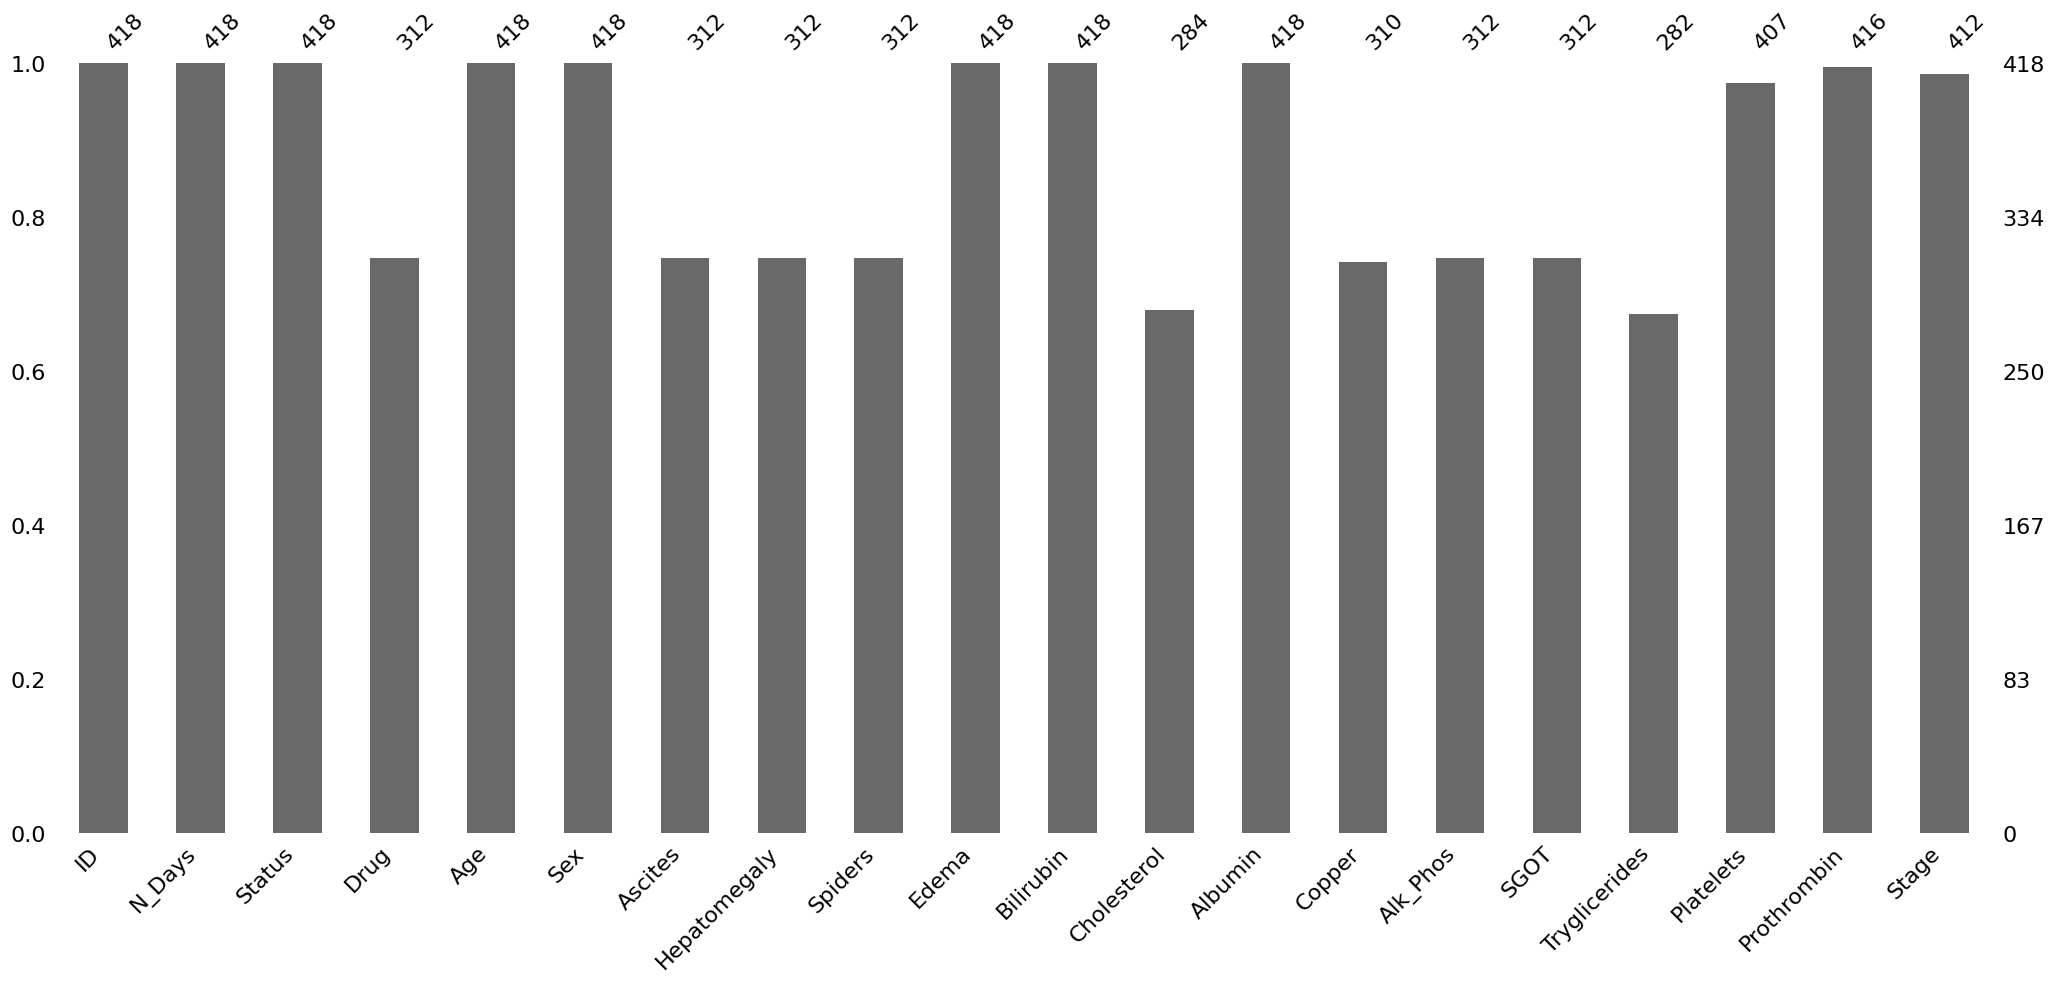

In [ ]:
msno.bar(df)
plt.show()

No existen valores infinitos, nos retorna una lista vacía.

In [ ]:
# Comprobación de la existencia de valores infinitos
is_inf = df.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

Series([], dtype: bool)

In [ ]:
#Rellenamos los valores nulos con la mediana

imputer = SimpleImputer(strategy="median")

In [ ]:
#Hacemos una copia del Df
df_copy = df.copy()

In [ ]:
# La clase imputer no admite valores categoricos, eliminamos los atributos categoricos
df_prep = df_copy.select_dtypes(exclude=['object'])

# Se le proporcionan los atributos numericos para que calcule los valores,
imputer.fit(df_prep)

SimpleImputer(strategy='median')

In [ ]:
# Rellenamos los valores nulos numéricos. Aún hace falta los valores nulos categóricos, los cuales más adelante se van a rellenar.
df_prep_nonan = imputer.transform(df_prep)

In [ ]:
df_prep_nonan

array([[1.0000e+00, 4.0000e+02, 2.1464e+04, ..., 1.9000e+02, 1.2200e+01,
        4.0000e+00],
       [2.0000e+00, 4.5000e+03, 2.0617e+04, ..., 2.2100e+02, 1.0600e+01,
        3.0000e+00],
       [3.0000e+00, 1.0120e+03, 2.5594e+04, ..., 1.5100e+02, 1.2000e+01,
        4.0000e+00],
       ...,
       [4.1600e+02, 1.0550e+03, 2.0819e+04, ..., 1.4300e+02, 9.9000e+00,
        3.0000e+00],
       [4.1700e+02, 6.9100e+02, 2.1185e+04, ..., 2.6900e+02, 1.0400e+01,
        3.0000e+00],
       [4.1800e+02, 9.7600e+02, 1.9358e+04, ..., 3.5000e+02, 1.0600e+01,
        4.0000e+00]])

In [ ]:
# Transformamos el resultado a un DataFrame de Pandas
df_copy_2 = pd.DataFrame(df_prep_nonan, columns=df_prep.columns)

In [ ]:
df_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    float64
 1   N_Days         418 non-null    float64
 2   Age            418 non-null    float64
 3   Bilirubin      418 non-null    float64
 4   Cholesterol    418 non-null    float64
 5   Albumin        418 non-null    float64
 6   Copper         418 non-null    float64
 7   Alk_Phos       418 non-null    float64
 8   SGOT           418 non-null    float64
 9   Tryglicerides  418 non-null    float64
 10  Platelets      418 non-null    float64
 11  Prothrombin    418 non-null    float64
 12  Stage          418 non-null    float64
dtypes: float64(13)
memory usage: 42.6 KB


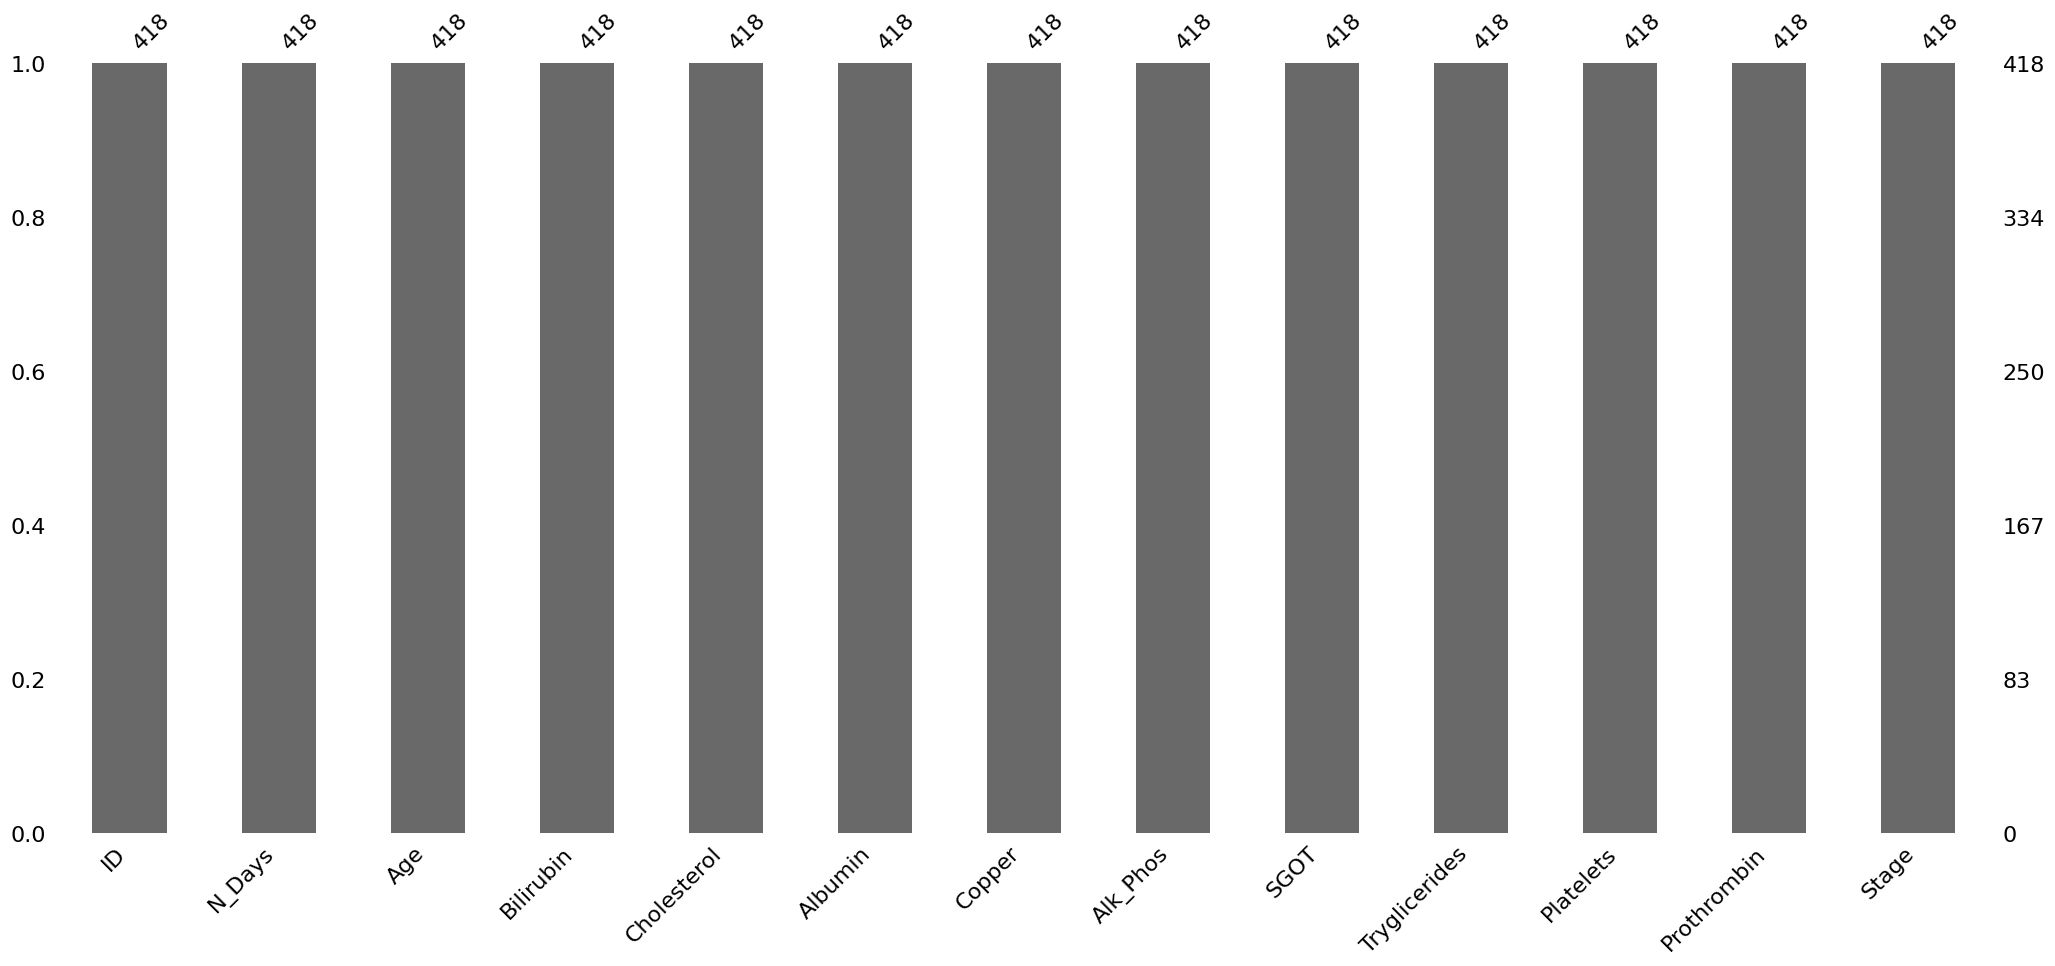

In [ ]:
msno.bar(df_copy_2)
plt.show()

In [ ]:
#Eliminamos las caracteristicas numericas de df_copy, para asi evitar que al unir las numericas de df_copy_2 se dupliquen
columnas_a_eliminar = ['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
df_copy = df_copy.drop(columnas_a_eliminar, axis=1)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Status        418 non-null    object
 1   Drug          312 non-null    object
 2   Sex           418 non-null    object
 3   Ascites       312 non-null    object
 4   Hepatomegaly  312 non-null    object
 5   Spiders       312 non-null    object
 6   Edema         418 non-null    object
dtypes: object(7)
memory usage: 23.0+ KB


In [ ]:
# Pegamos todas las caracteristicas al dataframe df_final
df_final = pd.concat([df_copy, df_copy_2], axis=1)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         418 non-null    object 
 1   Drug           312 non-null    object 
 2   Sex            418 non-null    object 
 3   Ascites        312 non-null    object 
 4   Hepatomegaly   312 non-null    object 
 5   Spiders        312 non-null    object 
 6   Edema          418 non-null    object 
 7   ID             418 non-null    float64
 8   N_Days         418 non-null    float64
 9   Age            418 non-null    float64
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

In [ ]:
# ID es irrelevante, entonces se va a eliminar de nuestro dataFrame
df_final = df_final.drop(['ID'], axis=1)

In [ ]:
# Le indicamos que incluya todas las columnas, sin importar que no sean numéricas
df_final.describe(include = 'all')

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418,312,418,312,312,312,418,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
unique,3,2,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C,D-penicillamine,F,N,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,232,158,374,288,160,222,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917.782297,18533.351675,3.220813,350.272727,3.497440,91.279904,1799.144976,120.564067,119.267943,256.866029,10.731100,3.023923
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1104.672992,3815.845055,4.407506,193.123893,0.424972,74.485481,1875.121982,49.085094,54.050691,97.024861,1.019587,0.875678
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1092.750000,15644.500000,0.800000,273.000000,3.242500,51.250000,1016.250000,91.000000,95.000000,190.000000,10.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2613.500000,21272.500000,3.400000,347.750000,3.770000,100.750000,1707.750000,135.750000,127.750000,315.500000,11.100000,4.000000


<Axes: >

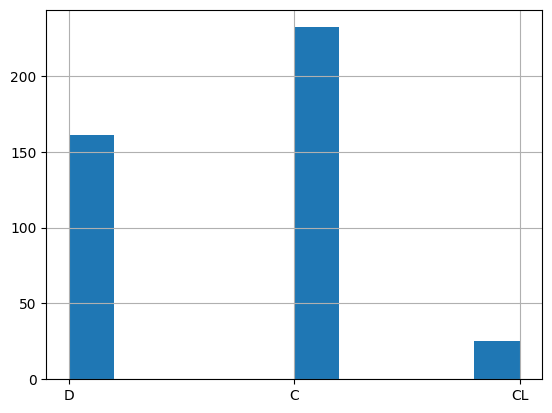

In [ ]:
# Mostrar los valores de la característica como un histograma

df_final["Status"].hist()

<Axes: >

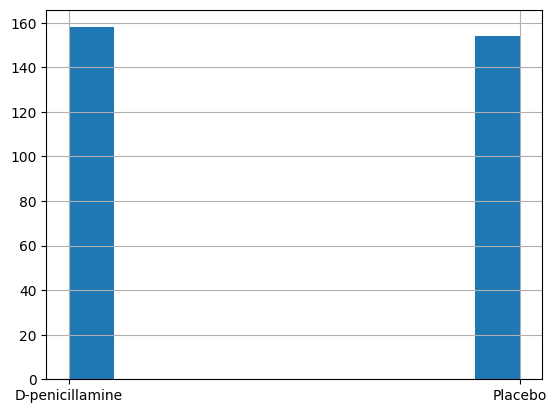

In [ ]:
# Mostrar los valores de la característica como un histograma

df_final["Drug"].hist()

<Axes: >

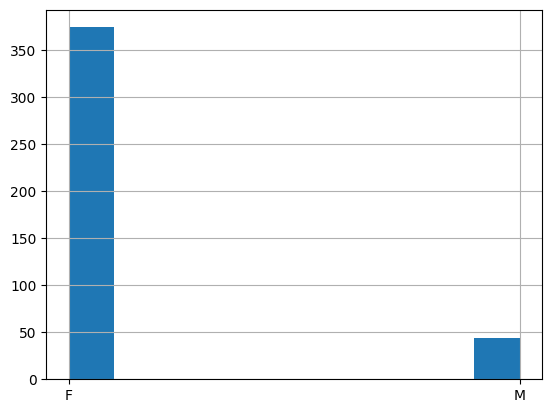

In [ ]:
# Mostrar los valores de la característica como un histograma

df_final["Sex"].hist()

<Axes: >

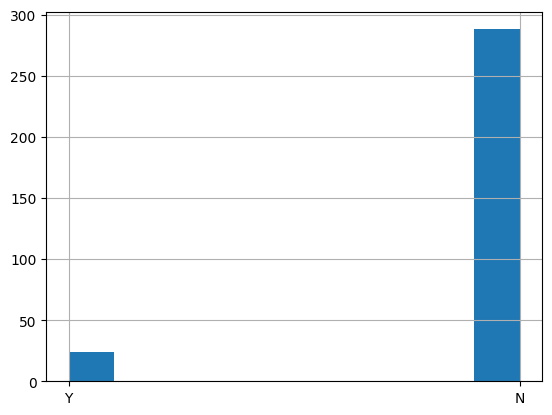

In [ ]:
# Mostrar los valores de la característica como un histograma

df_final["Ascites"].hist()

<Axes: >

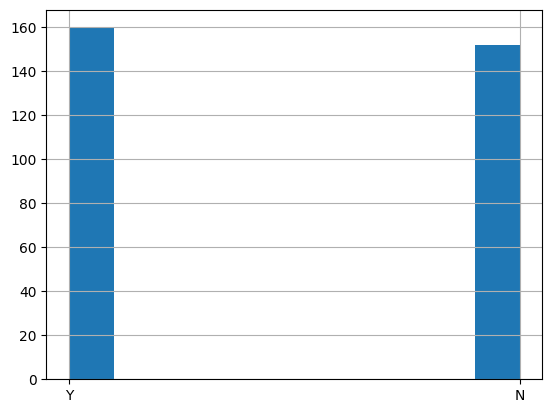

In [ ]:
# Mostrar los valores de la característica como un histograma

df_final["Hepatomegaly"].hist()

<Axes: >

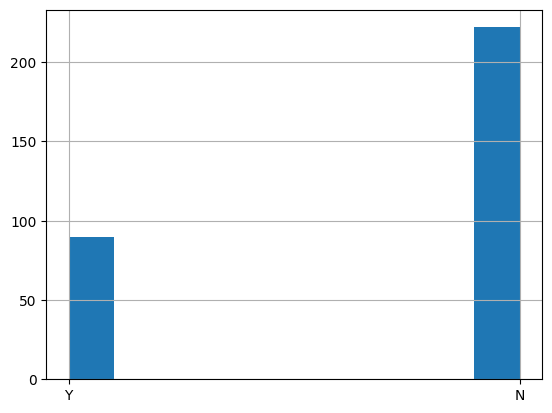

In [ ]:
# Mostrar los valores de la característica como un histograma

df_final["Spiders"].hist()

<Axes: >

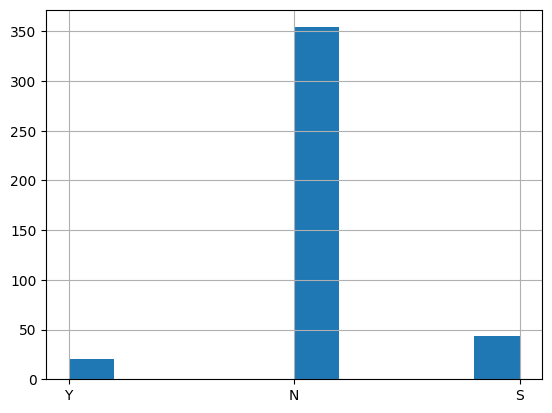

In [ ]:
# Mostrar los valores de la característica como un histograma

df_final["Edema"].hist()

In [ ]:
# Mostrar los valores únicos que tiene un el atributo Stage, ya que será la variable a predecir.
df["Stage"].value_counts()

3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

In [ ]:
#Transformamos categoricas a numéricas
labelEncoder = LabelEncoder()
df_final['Status'] = labelEncoder.fit_transform(df_final['Status'])
df_final['Drug'] = labelEncoder.fit_transform(df_final['Drug'])
df_final['Sex'] = labelEncoder.fit_transform(df_final['Sex'])
df_final['Ascites'] = labelEncoder.fit_transform(df_final['Ascites'])
df_final['Hepatomegaly'] = labelEncoder.fit_transform(df_final['Hepatomegaly'])
df_final['Spiders'] = labelEncoder.fit_transform(df_final['Spiders'])
df_final['Edema'] = labelEncoder.fit_transform(df_final['Edema'])

In [ ]:
df_final.head(3)

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2,0,0,1,1,1,2,400.0,21464.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,0,0,0,0,1,1,0,4500.0,20617.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,2,0,1,0,0,0,1,1012.0,25594.0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0


De color rojo son los que clasificaría con Hepatitis:

<ipython-input-33-d9303997da73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[df_final['Stage'] == 3.0]['Albumin'],color='blue')
<ipython-input-33-d9303997da73>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[df_final['Stage'] == 4.0]['Albumin'],color='red')
<ipython-input-

(2.0, 4.5)

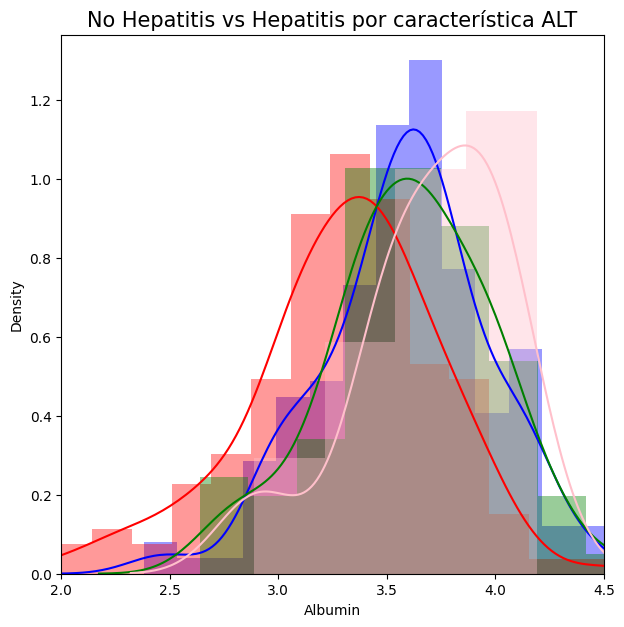

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df_final[df_final['Stage'] == 3.0]['Albumin'],color='blue')
sns.distplot(df_final[df_final['Stage'] == 4.0]['Albumin'],color='red')
sns.distplot(df_final[df_final['Stage'] == 2.0]['Albumin'],color='green')
sns.distplot(df_final[df_final['Stage'] == 1.0]['Albumin'],color='pink')

plt.title('No Hepatitis vs Hepatitis por característica ALT',fontsize=15)
plt.xlim([2.0,4.5])

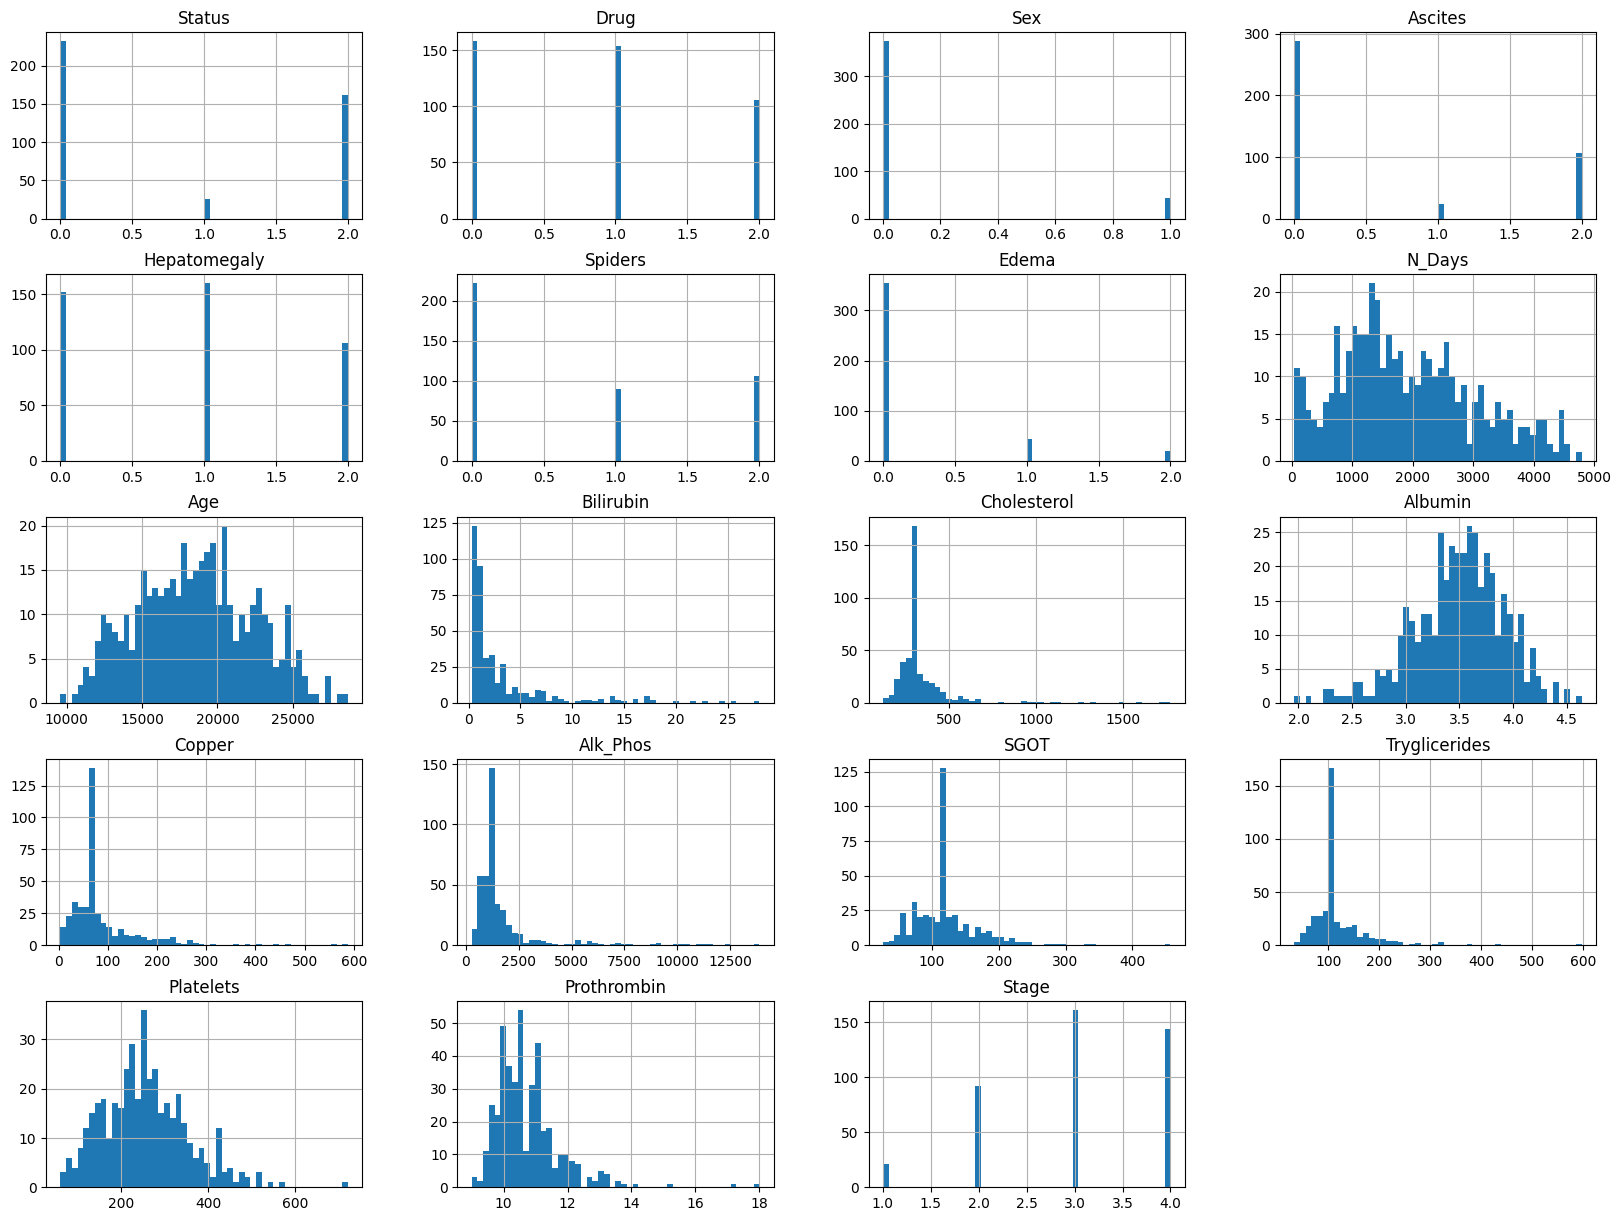

In [ ]:
# Representar gráficamente la distribución de los atributos
df_final.hist(bins=50, figsize=(20, 15))
plt.show()

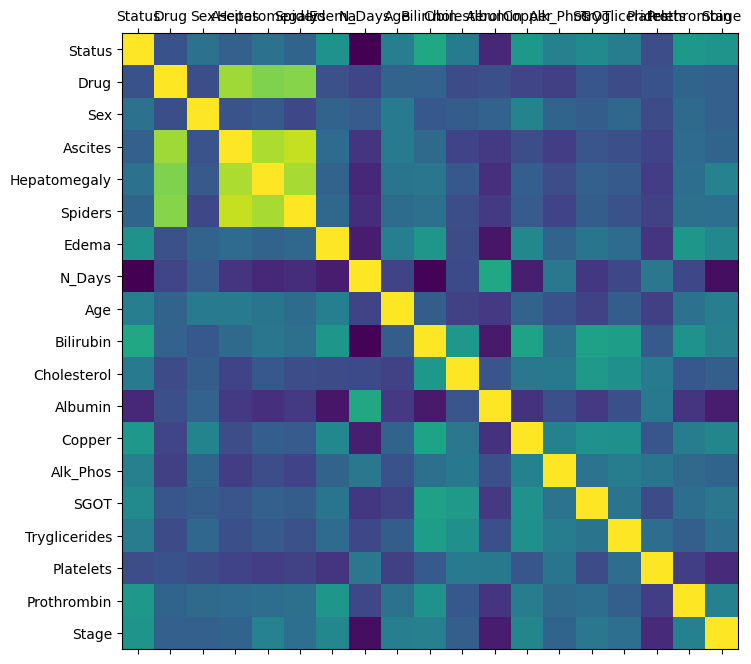

In [ ]:
# Representar gráficamente la matriz de correlación
corr = df_final.corr()
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
# Mostrar la correlación entre los atributos del conjunto de datos
corr_matrix = df_final.corr()
corr_matrix["Stage"].sort_values(ascending=False)

Stage            1.000000
Status           0.317177
Edema            0.243093
Copper           0.232149
Hepatomegaly     0.211329
Prothrombin      0.205981
Bilirubin        0.200314
Age              0.187852
SGOT             0.143568
Spiders          0.103316
Tryglicerides    0.099879
Ascites          0.042093
Alk_Phos         0.037905
Drug             0.018274
Sex              0.017356
Cholesterol      0.009930
Platelets       -0.239594
Albumin         -0.302190
N_Days          -0.362013
Name: Stage, dtype: float64

##3. Division del conjunto de datos

In [ ]:
# División del conjunto de datos 80/20 ya que son poquitos datos
train_set, test_set = train_test_split(df_final, test_size=0.2, random_state=42)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 336 to 102
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         334 non-null    int64  
 1   Drug           334 non-null    int64  
 2   Sex            334 non-null    int64  
 3   Ascites        334 non-null    int64  
 4   Hepatomegaly   334 non-null    int64  
 5   Spiders        334 non-null    int64  
 6   Edema          334 non-null    int64  
 7   N_Days         334 non-null    float64
 8   Age            334 non-null    float64
 9   Bilirubin      334 non-null    float64
 10  Cholesterol    334 non-null    float64
 11  Albumin        334 non-null    float64
 12  Copper         334 non-null    float64
 13  Alk_Phos       334 non-null    float64
 14  SGOT           334 non-null    float64
 15  Tryglicerides  334 non-null    float64
 16  Platelets      334 non-null    float64
 17  Prothrombin    334 non-null    float64
 18  Stage   

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 321 to 66
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         84 non-null     int64  
 1   Drug           84 non-null     int64  
 2   Sex            84 non-null     int64  
 3   Ascites        84 non-null     int64  
 4   Hepatomegaly   84 non-null     int64  
 5   Spiders        84 non-null     int64  
 6   Edema          84 non-null     int64  
 7   N_Days         84 non-null     float64
 8   Age            84 non-null     float64
 9   Bilirubin      84 non-null     float64
 10  Cholesterol    84 non-null     float64
 11  Albumin        84 non-null     float64
 12  Copper         84 non-null     float64
 13  Alk_Phos       84 non-null     float64
 14  SGOT           84 non-null     float64
 15  Tryglicerides  84 non-null     float64
 16  Platelets      84 non-null     float64
 17  Prothrombin    84 non-null     float64
 18  Stage     

##4. Preparación del conjunto de datos

In [ ]:
# Separamos las características de entrada de la característica de salida
X_train = train_set.drop("Stage", axis=1)
y_train = train_set["Stage"].copy()

X_test = test_set.drop("Stage", axis=1)
y_test = test_set["Stage"].copy()

In [ ]:
X_train.shape

(334, 18)

In [ ]:
X_test.shape

(84, 18)

In [ ]:
y_train.shape

(334,)

In [ ]:
y_test.shape

(84,)

In [ ]:
X_train.head(50)

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
336,2,2,0,2,2,2,0,2286.0,20454.0,1.8,309.5,3.64,73.0,1259.0,114.70,108.0,141.0,10.0
31,0,1,0,0,1,0,0,4523.0,19722.0,1.8,262.0,3.34,101.0,7277.0,82.56,158.0,286.0,10.6
84,2,1,0,0,1,0,0,3358.0,17246.0,2.1,262.0,3.48,58.0,2045.0,89.90,84.0,225.0,11.5
287,1,1,0,0,1,0,1,1067.0,17874.0,8.7,310.0,3.89,107.0,637.0,117.00,242.0,298.0,9.6
317,0,2,0,2,2,2,0,1680.0,15706.0,0.7,309.5,3.68,73.0,1259.0,114.70,108.0,306.0,9.5
211,0,1,0,0,0,0,0,2176.0,17263.0,1.2,232.0,3.98,11.0,1074.0,100.75,99.0,223.0,9.9
94,2,1,0,1,1,1,2,130.0,16944.0,17.4,309.5,2.64,182.0,559.0,119.35,108.0,401.0,11.7
389,0,2,1,2,2,2,0,1419.0,24837.0,3.0,309.5,3.15,73.0,1259.0,114.70,108.0,139.0,10.0
327,2,2,0,2,2,2,0,2111.0,19724.0,1.0,309.5,3.60,73.0,1259.0,114.70,108.0,251.0,12.1
5,2,1,0,0,1,0,0,2503.0,24201.0,0.8,248.0,3.98,50.0,944.0,93.00,63.0,251.0,11.0


# Máquina de Soporte Vectorial Polinomial

## Entrenamiento del modelo

In [ ]:

svm_clf = SVC(kernel="poly", degree=3, coef0=10, C=20)
svm_clf.fit(X_train, y_train)

SVC(C=20, coef0=10, kernel='poly')

Predicción con datos de prueba

In [ ]:
y_pred = svm_clf.predict(X_test)

Score obtenido:

In [ ]:
print("F1 Score:", f1_score(y_pred, y_test, average= 'micro'))

F1 Score: 0.5


## Matriz de confusión

In [ ]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

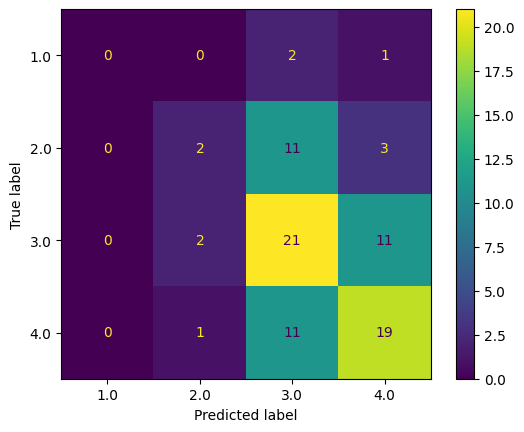

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=svm_clf.classes_)
cm_display.plot()

#Arbol Decisión

## Entrenamiento del modelo sin escalar

In [ ]:
MAX_DEPTH = 10

clf_tree = DecisionTreeClassifier(max_depth=MAX_DEPTH, random_state=42)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

Predicción con datos de prueba

In [ ]:
# Predecimos con el conjunto de datos de validación
y_pred = clf_tree.predict(X_test)

## Matriz de Confusión

In [ ]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

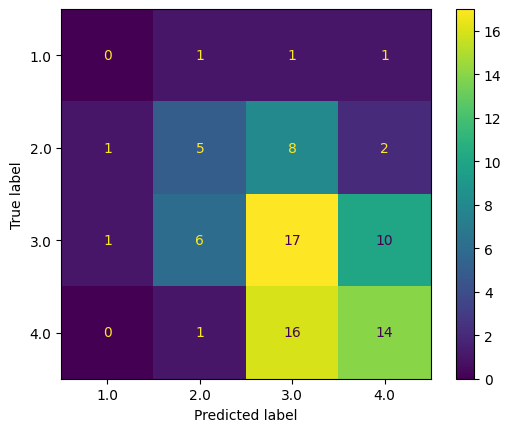

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf_tree.classes_)
cm_display.plot()

###Precisión

In [ ]:
# Intuición sobre falsos positivos que predice el modelo. En este caso como no es binario (la y) entonces tenemos que indicar un parámetro mas, llamado average. Existen varios tipos de average: macro, micro, weighted
# LE indicamos average igual micro
print("Precisión:", precision_score(y_test, y_pred, pos_label=3.0,  average='micro', ))

Precisión: 0.42857142857142855


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 3.0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


### Recall

In [ ]:
# LE indicamos average igual micro
print("Recall:", recall_score(y_test, y_pred, pos_label=0.0, average='micro'))

Recall: 0.42857142857142855


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0.0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


### F1 Score

In [ ]:
# Le indicamos average igual weighted
print("F1 score:", f1_score(y_test, y_pred, pos_label=0.0, average='weighted'))

F1 score: 0.4249200587676087


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0.0) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# Máquina de Soporte Vectorial Kernel Gaussiano

## Entrenamiento del modelo con Escalado

In [ ]:
rbf_kernel_svm_clf = Pipeline([
            ("scaler", RobustScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=0.5, C=1000))
        ])

rbf_kernel_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('svm_clf', SVC(C=1000, gamma=0.5))])

Predicción:

In [ ]:
y_pred = rbf_kernel_svm_clf.predict(X_test)

Score:

In [ ]:
print("F1 Score:", f1_score(y_pred, y_test, average= 'micro'))

F1 Score: 0.47619047619047616


# Árbol de decisión con Escalado

In [ ]:
arbol_clf = Pipeline([
            ("scaler", RobustScaler()),
            ("svm_clf", DecisionTreeClassifier(max_depth=MAX_DEPTH, random_state=42))
        ])

arbol_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('svm_clf',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

In [ ]:
y_pred = arbol_clf.predict(X_test)

In [ ]:
print("F1 Score:", f1_score(y_pred, y_test, average= 'micro'))

F1 Score: 0.42857142857142855


# Random Forest sin escalar

In [ ]:
# Modelo entrenado con el conjunto de datos sin escalar
clf_rnd = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_pred = clf_rnd.predict(X_test)

In [ ]:
print("F1 Score:", f1_score(y_pred, y_test, average= 'micro'))

F1 Score: 0.5357142857142857


## RF Escalado:

In [ ]:
randomF_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("randomforest_clf", RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
        ])

randomF_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('randomforest_clf',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

In [ ]:
y_pred = randomF_clf.predict(X_test)

In [ ]:
print("F1 Score:", f1_score(y_pred, y_test, average= 'micro'))

F1 Score: 0.5476190476190477


In [ ]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

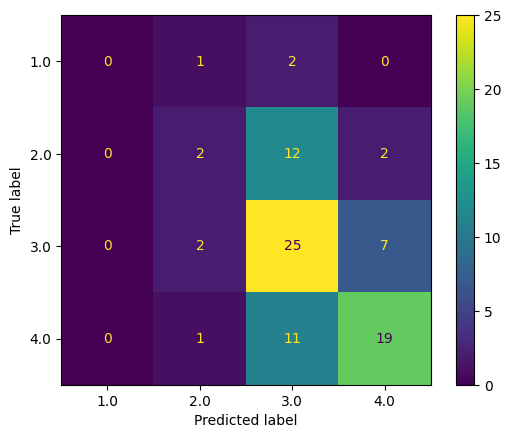

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=randomF_clf.classes_)
cm_display.plot()

In [ ]:
# Salvar el modelo en archivo .pkl
joblib.dump(randomF_clf, "08TipoCirrosis.pkl")

['08TipoCirrosis.pkl']

In [ ]:
# Cargar modelo
#svmCargado = joblib.load("08TipoCirrosis.pkl")

#Conclusión
Después de probarlo con distintos algoritmos de clasificación, entre estos SVM Polinomial, SVM utilizando Kernel Gaussiano, Árbol de decisión y Random Forest, también aplicando escalado por medio de StandarScaler o RobustEscaler, se llegó a la conclusión que los mejores resultados se obtuvieron por medio del algoritmo de Random Forest, aplicando la técnica de escalado StandarScaler obteniendo así una precisión del 54%. Sin embargo, estos resultados para este set de datos no son buenos.